In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [11]:
df.columns

Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [12]:
df['Release Year'] = pd.to_datetime(df['Release Date'],unit='s').dt.year
df['Release Month'] = pd.to_datetime(df['Release Date'],unit='s').dt.month
df['Release Month']

0       3
1       3
2       3
3       3
4       3
       ..
2504    4
2505    4
2506    4
2507    4
2508    4
Name: Release Month, Length: 2509, dtype: int32

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variable
features = df.select_dtypes(include=[int, float]).drop(columns=['Minimum Age'])
target = df['Minimum Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


<Axes: ylabel='None'>

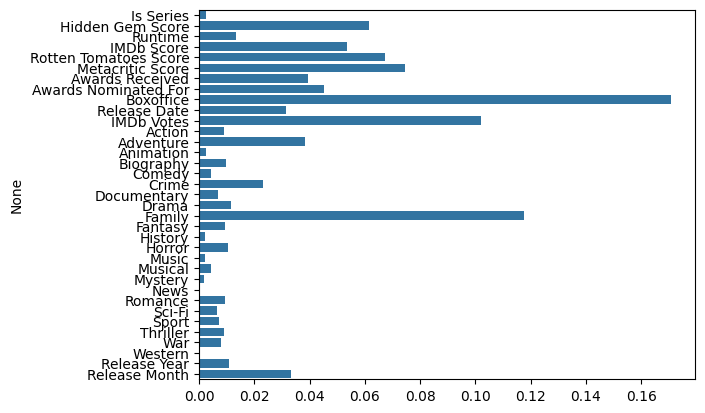

In [14]:

importances = clf.feature_importances_
sns.barplot(x=importances, y=features.columns)

In [15]:
# Define the threshold for low importance
threshold = 0.01

# Filter out features with importance below the threshold
important_features = features.columns[importances > threshold]

# Update the features dataframe to include only important features
features_important = features[important_features]

# Split the data into training and testing sets with important features
X_train_important, X_test_important, y_train, y_test = train_test_split(features_important, target, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf_important = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_important.fit(X_train_important, y_train)

# Make predictions
y_pred_important = clf_important.predict(X_test_important)

# Calculate the accuracy
accuracy_important = accuracy_score(y_test, y_pred_important)
print(f'Accuracy with important features: {accuracy_important:.2f}')

Accuracy with important features: 0.60


<Axes: ylabel='None'>

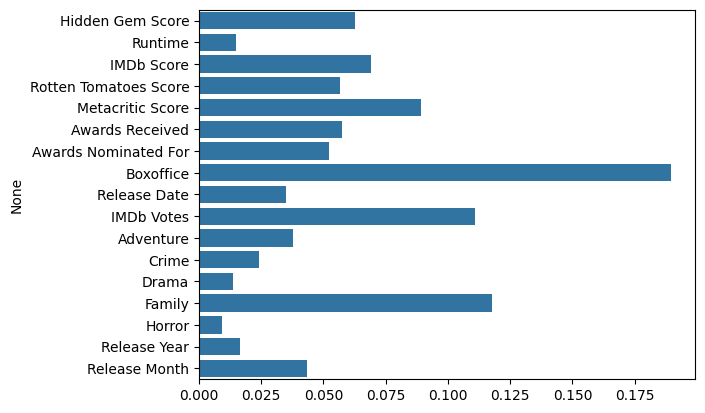

In [16]:

importances = clf_important.feature_importances_
sns.barplot(x=importances, y=features_important.columns)

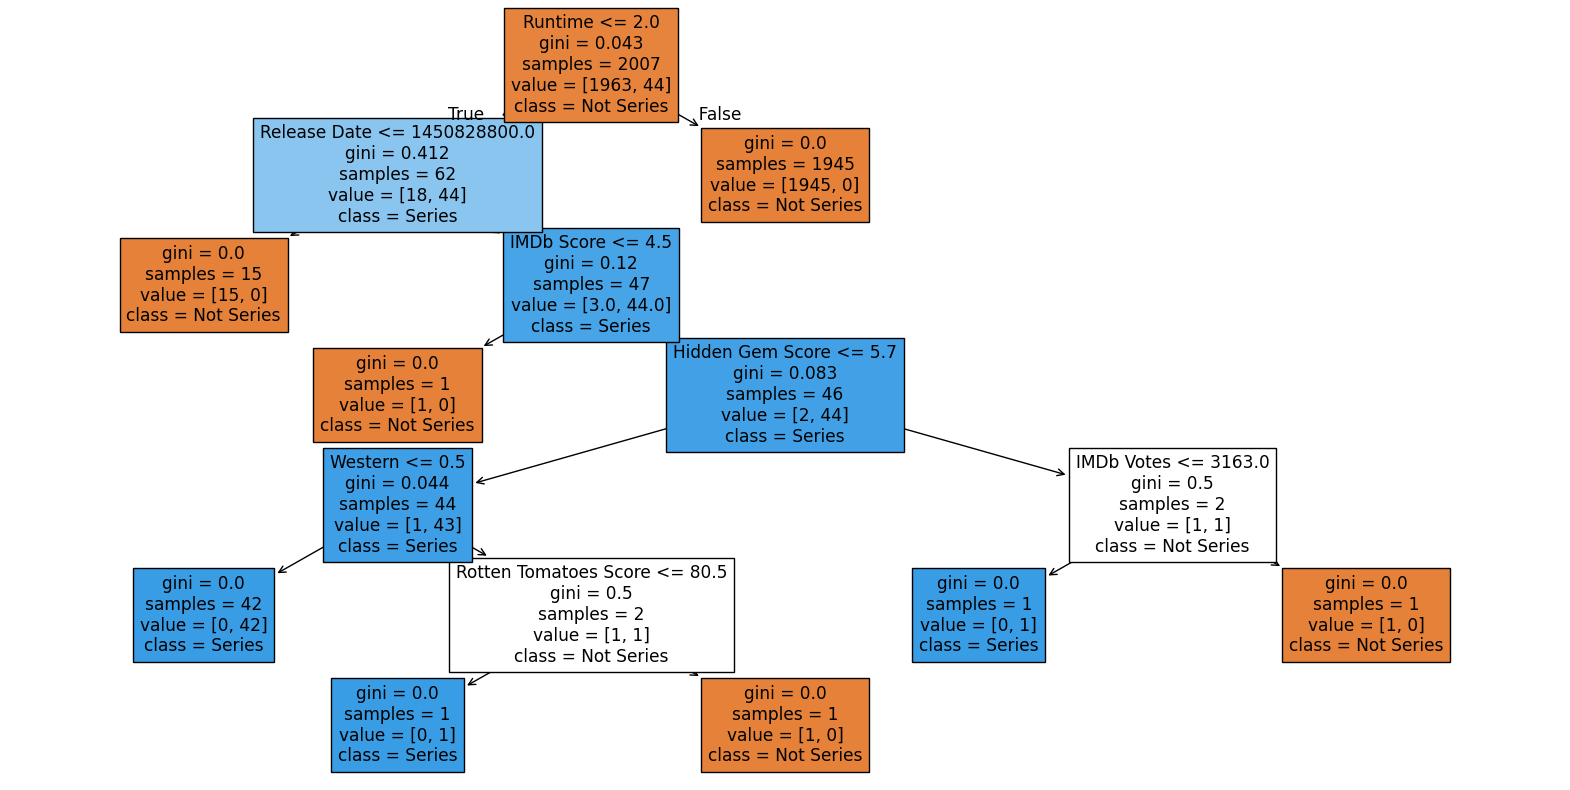

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the features and target variable for 'Is Series'
features_is_series = df.select_dtypes(include=[int, float]).drop(columns=['Is Series'])
target_is_series = df['Is Series']

# Split the data into training and testing sets
X_train_is_series, X_test_is_series, y_train_is_series, y_test_is_series = train_test_split(features_is_series, target_is_series, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf_is_series = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_is_series.fit(X_train_is_series, y_train_is_series)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_is_series, feature_names=features_is_series.columns, class_names=['Not Series', 'Series'], filled=True)
plt.show()

<Axes: ylabel='None'>

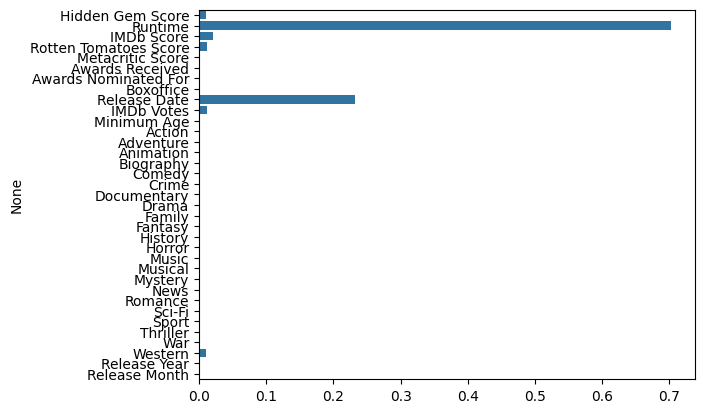

In [18]:
importances = clf_is_series.feature_importances_
sns.barplot(x=importances, y=features_is_series.columns)

In [19]:
# Make predictions
y_pred_is_series = clf_is_series.predict(X_test_is_series)

# Calculate the accuracy
accuracy_is_series = accuracy_score(y_test_is_series, y_pred_is_series)
print(f'Accuracy: {accuracy_is_series:.2f}')

Accuracy: 1.00
